In [1]:
import pandas as pd
import os
from models import *
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

path = './osfstorage-archive/Experiment 1/twostep_data_study1/'
paths = [path + x for x in os.listdir(path) if x.endswith('.csv')]

In [2]:
fn = paths[0]
df = read_fn(fn)
df = wrangle_df(df)

/Users/benjidayan/coding/model_free_based/models.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.common_trans = df.common_trans.apply(lambda x: x == 'true')
/Users/benjidayan/coding/model_free_based/models.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.choice1_int = df.choice1_int.astype(int) - 1
/Users/benjidayan/coding/model_free_based/models.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [11]:
#### Get big bar plot
from tqdm import tqdm

sp_rew_common = []
sp_rew_rare = []
sp_unrew_common = []
sp_unrew_rare = []

for fn in tqdm(paths[:200]):
    df = read_fn(fn)
    df = wrangle_df(df)

    drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
    model = Model(alpha=0.15, beta_mf0=0.1, beta_mf1=0.1, beta_stick=0.4, beta_mb=1.0)

    drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
    outs = model.perform_trials(drifts_iterator, save_Qs=True)

    df_outs = outs_to_df(outs)
    df_outs = df_outs.iloc[1:, :]

    stay_prob_rew_common = df_outs.loc[df_outs.prev_rew & df_outs.prev_common_trans].stay
    stay_prob_rew_rare = df_outs.loc[df_outs.prev_rew & ~df_outs.prev_common_trans].stay
    stay_prob_unrew_common = df_outs.loc[~df_outs.prev_rew & ~df_outs.prev_common_trans].stay
    stay_prob_unrew_rare = df_outs.loc[~df_outs.prev_rew & ~df_outs.prev_common_trans].stay

    sp_rew_common.append(stay_prob_rew_common.mean())
    sp_rew_rare.append(stay_prob_rew_rare.mean())
    sp_unrew_common.append(stay_prob_unrew_common.mean())
    sp_unrew_rare.append(stay_prob_unrew_rare.mean())



  0%|          | 0/200 [00:00<?, ?it/s]/Users/benjidayan/coding/model_free_based/models.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.common_trans = df.common_trans.apply(lambda x: x == 'true')
/Users/benjidayan/coding/model_free_based/models.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.choice1_int = df.choice1_int.astype(int) - 1
/Users/benjidayan/coding/model_free_based/models.py:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Text(0, 0.5, 'P(stay)')

[Text(1, 0, 'prev rewarded'), Text(2, 0, 'prev unrewarded')]

(0.5, 1.0)

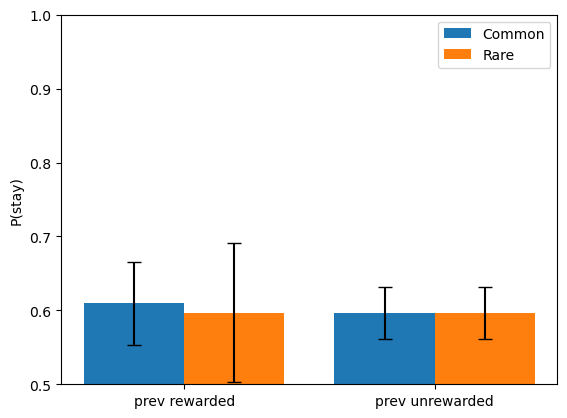

In [13]:
# Plotting
bar_width = 0.4
fig, ax = plt.subplots()
bars1 = ax.bar([0.8, 1.8], [np.mean(sp_rew_common), np.mean(sp_unrew_common)], bar_width, label='Common', capsize=5, yerr=[np.std(sp_rew_common), np.std(sp_unrew_common)])
bars2 = ax.bar([1.2, 2.2], [np.mean(sp_rew_rare), np.mean(sp_unrew_rare)], bar_width, label='Rare', capsize=5, yerr=[np.std(sp_rew_rare), np.std(sp_unrew_rare)])

# ax.set_xlabel('Reward')
ax.set_ylabel('P(stay)')
# ax.set_title('Experiment 1')
ax.set_xticks([1, 2])
ax.set_xticklabels(['prev rewarded', 'prev unrewarded'])

# set y axes limits
ax.set_ylim([0.5, 1.0])

plt.legend()

In [16]:
# fn = paths[0]
# df = read_fn(fn)
# df = wrangle_df(df)

# drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
# model = Model(alpha=0.15, beta_mf0=0.1, beta_mf1=0.1, beta_stick=0.1, beta_mb=1.0)

# drifts_iterator = (x[1] for x in df.loc[:, ['drift1', 'drift2', 'drift3', 'drift4']].iterrows())
# outs = model.perform_trials(drifts_iterator, save_Qs=True)

# df_outs = outs_to_df(outs)
# df_outs

In [15]:
df_outs

,choice1,stage2,choice2,reward,Qstage2,Q_MB,Q_MF0,Q_MF1,stay,prev_rew,common_trans,prev_common_trans
1,1,0,0,0,"[[0.425, 0.5], [0.575, 0.5]]","[0.5, 0.575]","[0.51125, 0.48875]","[0.575, 0.425]",False,True,False,False
2,0,0,1,1,"[[0.425, 0.575], [0.575, 0.5]]","[0.575, 0.575]","[0.5208124999999999, 0.48875]","[0.6387499999999999, 0.425]",False,False,True,False
3,0,1,1,1,"[[0.425, 0.575], [0.575, 0.575]]","[0.575, 0.575]","[0.5289406249999999, 0.48875]","[0.6929375, 0.425]",True,True,False,True
4,1,1,1,0,"[[0.425, 0.575], [0.575, 0.48874999999999996]]","[0.575, 0.575]","[0.5289406249999999, 0.48875]","[0.6929375, 0.36124999999999996]",False,True,True,False
5,1,0,1,1,"[[0.425, 0.6387499999999999], [0.575, 0.488749...","[0.6387499999999999, 0.575]","[0.5289406249999999, 0.51125]","[0.6929375, 0.4570624999999999]",True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
193,1,1,0,0,"[[0.16639633287770983, 0.4489738905064362], [0...","[0.4489738905064362, 0.4989152263184327]","[0.39864218228230713, 0.4475405837119319]","[0.4487723309179902, 0.4235898045230013]",False,True,True,True
194,1,1,1,1,"[[0.16639633287770983, 0.4489738905064362], [0...","[0.4489738905064362, 0.5007909298913265]","[0.39864218228230713, 0.45552813563884104]","[0.4487723309179902, 0.5100513338445511]",True,False,True,True
195,1,1,1,0,"[[0.16639633287770983, 0.4489738905064362], [0...","[0.4489738905064362, 0.4989152263184327]","[0.39864218228230713, 0.451049758854159]","[0.4487723309179902, 0.4335436337678685]",True,True,True,True
196,1,1,0,1,"[[0.16639633287770983, 0.4489738905064362], [0...","[0.4489738905064362, 0.5740779423706678]","[0.39864218228230713, 0.46950398638163526]","[0.4487723309179902, 0.5185120887026882]",True,False,True,True


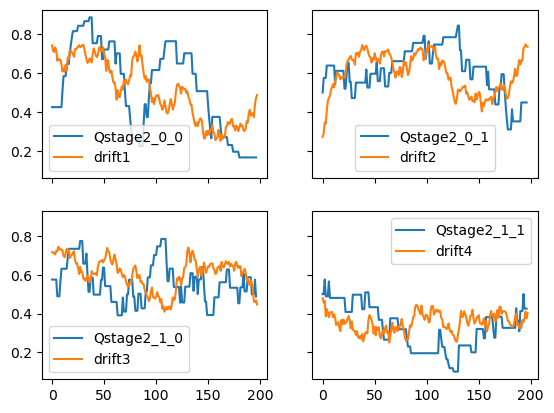

In [17]:
qstage2_arr = np.stack(df_outs.Qstage2)
qstage2_plot(qstage2_arr, df)


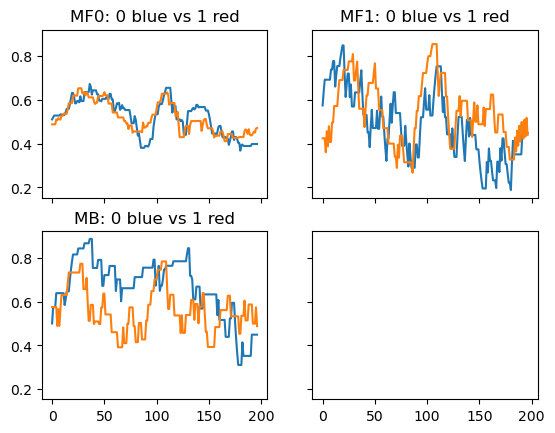

In [18]:
qstage1_plot(df_outs)

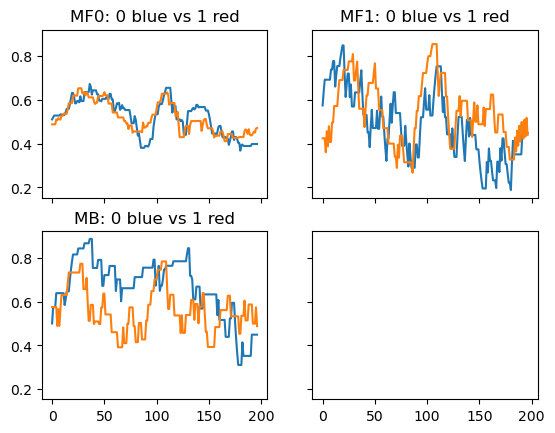

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

q_mf0_arr = np.stack(df_outs.Q_MF0)
_ = axes[0][0].plot(q_mf0_arr[:, 0], label='q_mf0_0')
_ = axes[0][0].plot(q_mf0_arr[:, 1], label='q_mf0_1')

q_mf1_arr = np.stack(df_outs.Q_MF1)
_ = axes[0][1].plot(q_mf1_arr[:, 0], label='q_mf1_0')
_ = axes[0][1].plot(q_mf1_arr[:, 1], label='q_mf1_1')

q_mb_arr = np.stack(df_outs.Q_MB)
_ = axes[1][0].plot(q_mb_arr[:, 0], label='q_mb_0')
_ = axes[1][0].plot(q_mb_arr[:, 1], label='q_mb_1')

_ = axes[0][0].set_title('MF0: 0 blue vs 1 red')
_ = axes[0][1].set_title('MF1: 0 blue vs 1 red')
_ = axes[1][0].set_title('MB: 0 blue vs 1 red')
